In [97]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os.path, sys, re
from PIL import Image
# from resizeimage import resizeimage

In [44]:
from keras.preprocessing import image

Using TensorFlow backend.


# Example cropping

In [107]:
img = image.load_img('data/NormalPersonECGImages/Normal_1.jpg', grayscale=True) #target_size=(28,28), grayscale=True

print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)

In [288]:
left = 130
top = 300
right = 640
bottom = 550

In [289]:
img_res = img.crop(crop_dict['Lead13']) 
# img_res.show()


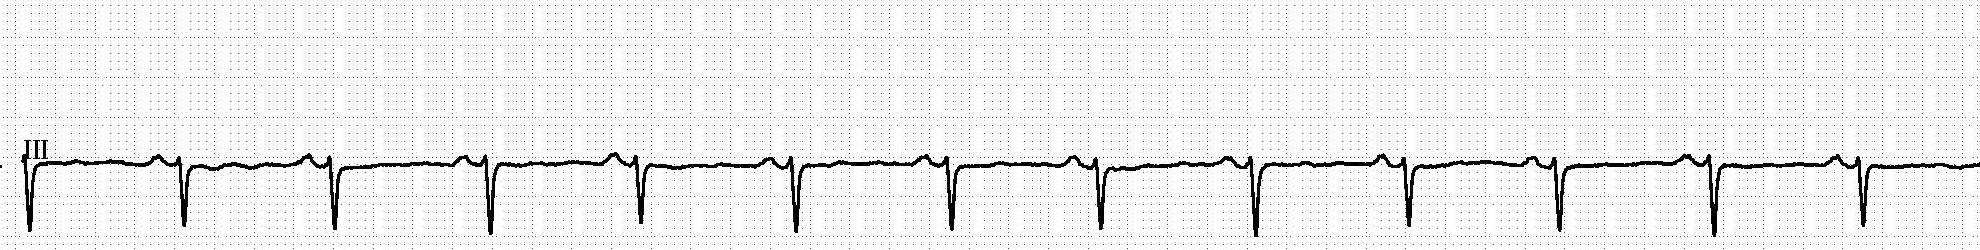

In [290]:
img_res

In [4]:
crop_dict={}
crop_dict={ 'Lead1':(130,300,640,550), 'Lead2':(700,350,1130,550),\
           'Lead3':(1190,350,1620,550), 'Lead4':(1670,350,2110,550),\
           'Lead5':(130,600,640,850), 'Lead6':(700,600,1130,850),\
           'Lead7':(1190,600,1620,850), 'Lead8':(1670,600,2110,850),\
           'Lead9':(130,900,640,1150), 'Lead10':(700,900,1130,1150),\
           'Lead11':(1190,900,1620,1150), 'Lead12':(1670,900,2110,1150),\
           'Lead13':(130,1200,2110,1450)
           
          }

In [106]:
!mkdir data/NormalPersonECGImages/Cropped_Images
!mkdir data/ECGImagesofMyocardialInfarctionPatients/Cropped_Images
!mkdir data/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images
!mkdir data/ECGImagesofPatientthathaveHistoryofMI/Cropped_Images

mkdir: data/NormalPersonECGImages/Cropped_Images: File exists
mkdir: data/ECGImagesofMyocardialInfarctionPatients/Cropped_Images: File exists
mkdir: data/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images: File exists
mkdir: data/ECGImagesofPatientthathaveHistoryofMI/Cropped_Images: File exists


# Loop to crop images of all folders

In [8]:

def crop():
    for item in dirs:
        if item== '.DS_Store':
            continue
            
        if os.path.isfile(path+item):

            #print('Yes')
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            
            of, oe = os.path.splitext(item)
            
            for i in range(1,14):
                imCrop = im.crop(box=crop_dict['Lead'+str(i)])
                imCrop.save(path2+of+'Cropped_lead'+str(i)+'.png', "PNG", quality=100)
            #except I0


for i in range(1,5): 

    if i==1:
        path = "data/NormalPersonECGImages/"
        path2="data/NormalPersonECGImages/Cropped_Images/"

    if i==2:
        path = "data/ECGImagesofMyocardialInfarctionPatients/"
        path2="data/ECGImagesofMyocardialInfarctionPatients/Cropped_Images/"

    if i==3:
        path = "data/ECGImagesofPatientthathaveabnormalheartbeat/"
        path2="data/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images/"

    if i==4:
        path = "data/ECGImagesofPatientthathaveHistoryofMI/"
        path2="data/ECGImagesofPatientthathaveHistoryofMI/Cropped_Images/"


    dirs = os.listdir(path)
    
    crop()


# Deleting instructions

In [166]:
def purge(dir, pattern):
    for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))
#purge('data/NormalPersonECGImages','Cropped.*')
#purge('/','Cropped_lead*')

In [2]:
cd data/NormalPersonECGImages/Cropped_Images/

/Users/aithi/Desktop/Summer_2021/ECG/data/NormalPersonECGImages/Cropped_Images


In [81]:
img=cv2.imread( 'Normal_100Cropped_lead1.png' )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


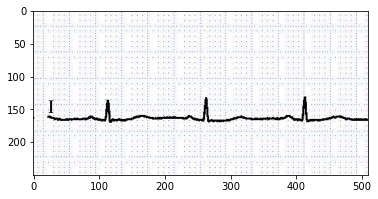

In [82]:
plt.imshow(img)

In [83]:
# Set threshold level
threshold_level = 50

# Find coordinates of all pixels below threshold
coords = np.column_stack(np.where(gray < threshold_level))

print(coords)

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
img[mask] = (204, 119, 0)

# cv2.imshow('image', img)
# cv2.waitKey()

[[131 412]
 [131 413]
 [131 414]
 ...
 [170 118]
 [170 119]
 [170 267]]


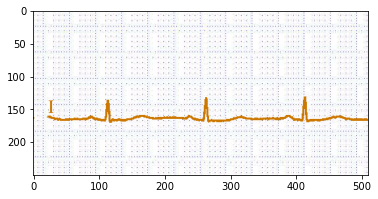

In [84]:
plt.imshow(img)
# plt.colorbar()

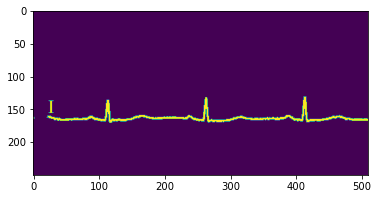

In [85]:
plt.imshow(mask)
# plt.colorbar()

In [51]:
mask.shape

(250, 510)

In [54]:
coords.shape

(125024, 2)

In [74]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(0.0, 500.0, 250.0, 0.0)

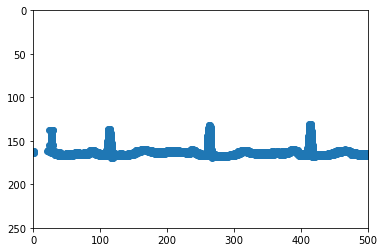

In [96]:
coords = np.column_stack(np.where(gray < threshold_level))


np.array(indices).shape

plt.scatter(coords[:,1], coords[:,0])
plt.axis([0,500,250,0])

In [54]:
img.shape
gray.shape

(250, 510)

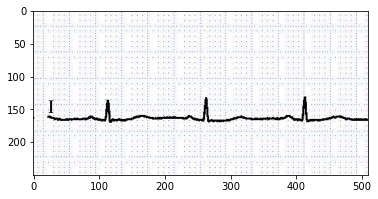

In [60]:
plt.imshow(img)

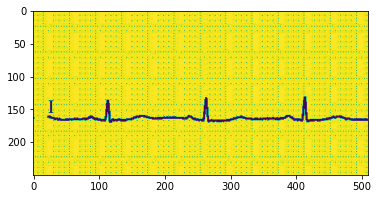

In [61]:
plt.imshow(gray)

In [55]:
def show_graph(x_list, y_list, width, height):
    plt.figure(figsize = [width, height]) 
    plt.scatter(x_list, y_list, marker='.', s=5)
    plt.show()
    return

In [81]:
gray.shape

(250, 510)

In [82]:
gray[0,0]

253

In [ ]:
(2, 127072)


In [106]:
indices = np.where(gray > 254)

In [107]:
np.array(indices).shape

(2, 16803)

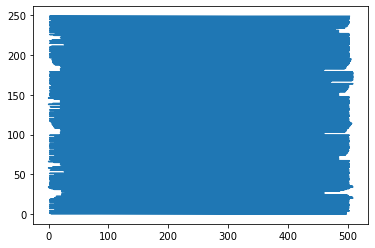

In [108]:
plt.plot(np.array(indices)[1],np.array(indices)[0])

In [79]:
x_list, y_list = [], []
for x in np.ra(0, 500, 1):
    for y in np.arange(0, 200, 1):        
        if np.all(gray[x,y] > 200 ):
            x_list.append(x)
            y_list.append(y) 
        
        if np.all(gray[y][x] == (0, 0, 0)):
            x_list.append(x)
            y_list.append(500-y)
plt.plot(x_list, y_list)
# show_graph(x_list, y_list, 18, 3)

IndexError: index 250 is out of bounds for axis 0 with size 250

In [ ]:
def locate_pos(image, color):
    position_list = []
    y_level = 42
    while len(position_list) == 0 and y_level < 100:
        x=100
        while x<7422:
            if np.all(image[y_level][x] == color):
                position_list.append(x)
                x += 25
            x += 1
        y_level+=2
    return position_list

In [39]:
background_image = cv2.imread('/Users/aithi/Desktop/Summer_2021/ECG/data/background.png', cv2.IMREAD_COLOR)
gray_background = cv2.cvtColor(background_image, cv2.COLOR_BGR2GRAY)


In [41]:
img=cv2.imread( 'Normal_100Cropped_lead1.png' )

gray_original = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

background_image = cv2.imread('/Users/aithi/Desktop/Summer_2021/ECG/data/background.png', cv2.IMREAD_COLOR)
gray_background = cv2.cvtColor(background_image, cv2.COLOR_BGR2GRAY)

foreground = np.absolute(gray_original - gray_background)
# foreground[foreground > 50] = 255

# foreground=cv2.absdiff(gray_original,gray_background)

# ret,thresh1 = cv2.threshold(img,240,255,cv2.THRESH_BINARY_INV)

ValueError: operands could not be broadcast together with shapes (250,510) (59,264) 

In [338]:
cv2.imshow('Original Image', foreground)

NameError: name 'foreground' is not defined